In [10]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jan 16 18:40:27 2020

@author: metin
"""

#%%
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import sys
from mpl_toolkits.axes_grid1 import make_axes_locatable


mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['axes.linewidth'] = 2
plt.rc('text', usetex=True)

In [11]:
if (len(sys.argv)!=2):
  sys.exit('number of arguments \n <path to file> <path to window> <start> <end>')
path = str(sys.argv[1])
file_win = str(sys.argv[2])

#specify the interation range you consider
start = int(sys.argv[3]) 
end = int(sys.argv[4])



SystemExit: number of arguments 
 <path to file>

In [12]:
#path = "/work/metin/birth/chunks_1/chunk_b/"
#file_win = "winraw0.dat"
#start = 50
#end = 2000


In [13]:
win = np.fromfile(path+file_win,dtype=np.float32)
w = np.where(win>0)[0]

#you want random 100 cells in data region:
np.random.seed(0) # fix seed for reproducability
vox = np.random.choice(w,100)




a = range(start,end)[::10] #if you output density every 10th iteration
files=[]
for i in a :
  files.append(path+'deltaLOGN_'+str(i)+'.dat')
  
dens = np.zeros((len(files),len(vox)))

for i in range(len(files)):
  dens[i,:] = np.fromfile(files[i],dtype=np.float32)[vox]


In [37]:
#Calculate the autocorrelation

def acf(x):
  mean=np.mean(x)
  var=np.var(x)  
  xp=x-mean
  res = np.correlate(xp,xp,'full')[len(x)-1:]/var/len(x)
  return res




In [53]:
# array to control transparency of lines
aa = np.linspace(2.,0.5,len(vox))
c = np.linspace(1,len(vox),len(vox))
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=plt.cm.jet)
cmap.set_array([])

# set up array for results 
modes = range(len(dens))
mean_arr = np.zeros((len(vox),len(modes)))

Plot correlation length for all 100 selected voxels

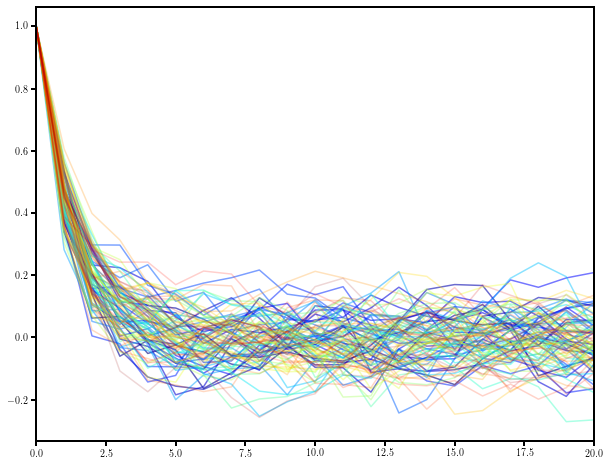

In [58]:
fig = plt.figure(figsize=(10., 8.))
ax = fig.add_subplot(111)
for n in range(len(vox)):
  mean_arr[n] = acf(dens[:,n])
  plt.plot(mean_arr[n],lw=1.5,alpha=0.3*aa[n],c=cmap.to_rgba(c[n]))
  plt.xlim([0,20])

Function to integrate 

In [119]:
#Define number of effective sample size
def Neff(samples):
    auto_corr = acf(samples)
    cut = np.where(auto_corr<0.05)[0].min()
    taus=2*np.cumsum(auto_corr)
    Neff = len(samples)/taus[cut]
    return cut, Neff, taus

#Taken from arxiv:1706.07561
def Neff_weight(samples):
    auto_corr = acf(samples)
    cut = np.where(auto_corr<0.05)[0].min()
    tau=0
    for i in range(1,cut):
        tau+=1+2.*(1-i/len(samples))*auto_corr[i]
    Neff = len(samples)/tau
    return Neff

In [120]:
#example
cut_0,Neff_0,taus_0 = Neff(dens[:,0])

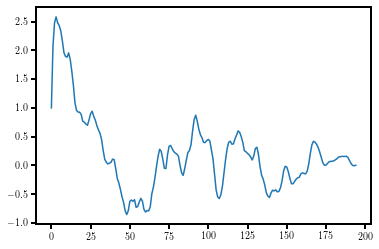

In [121]:
plt.plot(taus) #You can see that the integrated autocorrelation time is meaningless for long lag integration ranges

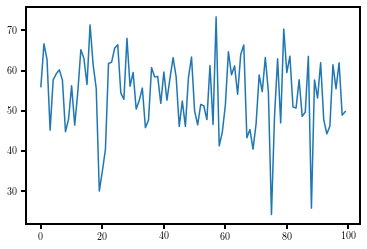

In [126]:
res_neff = np.zeros((len(vox)))

for i in range(len(res_neff)):
    _,res_neff[i],_ = Neff(dens[:,i])

plt.plot(res_neff) #plot Neff for all considered voxels

Second method with weighted Nef

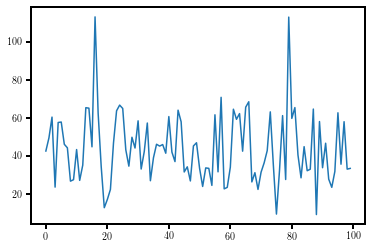

In [127]:
res_neff = np.zeros((len(vox)))
for i in range(len(res_neff)):
    res_neff[i] = Neff_weight(dens[:,i])

plt.plot(res_neff)